# <b>Lung Cancer Prediction Menggunakan SVM</b>
<hr>

Kelompok 3 :
1. Saripah (2110511060)
2. David Siddi (2110511061)
3. Muhammad Daffa Raihan Nurrizqi (2110511062)

Dalam praktikum kali ini, kami mengembangkan model klasifikasi data dengan menggunakan algoritma SVM (Support Vector Machine) untuk memprediksi probabilitas seseorang terkena penyakit kanker paru-paru. Praktikum ini bertujuan untuk mendalami wawasan tentang penggunaan algoritma SVM sebagai model klasifikasi data sekaligus dengan harapan memberikan kontribusi pada bidang kesehatan melalui deteksi penyakit kanker paru-paru.

##### Import library yang dibutuhkan

Pandas adalah library yang digunakan untuk manipulasi dan analisis data.
NumPy adalah library yang digunakan untuk komputasi numerik di Python. 
Matplotlib adalah library yang digunakan untuk membuat visualisasi data, seperti grafik dan plot. 
Seaborn adalah dibangun di atas Matplotlib dan digunakan untuk membuat visualisasi data yang lebih menarik dan informatif. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load dataset

Dataset yang kami gunakan dalam praktikum ini merupakan dataset "Lung Cancer" yang bersumber dari situs web Kaggle.com. Dataset tersebut dibuat dengan maksud untuk mempermudah masyarakat dalam hal mengetahui probabilitas resiko kanker dengan biaya yang rendah dan membantu masyarakat dalam memberikan informasi terkait hal-hal yang perlu dilakukan terhadap status resiko mereka. Dataset ini dikumpulkan dari survey situs web sistem prediksi kanker paru-paru.

<b>Kaggle :</b> https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer

In [24]:
data = pd.read_csv("survey lung cancer.csv")
df = pd.DataFrame(data)

head() merupakan metode Pandas yang digunakan untuk mengambil beberapa baris pertama dari DataFrame. 
Secara default, menampilkan 5 baris pertama.

In [4]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### <b>1. Preprocessing Data</b>
<hr>

##### Exploratory data analysis

describe() merupakan metode pandas yang digunakan untuk menghasilkan statistik deskriptif dari DataFrame.
Statistik deskriptif ini mencakup ringkasan statistik seperti count (jumlah data), mean (rata-rata), std (standar deviasi), min (nilai minimum), 25% (kuartil pertama), 50% (kuartil kedua atau median), 75% (kuartil ketiga), dan max (nilai maksimum) untuk setiap kolom numerik dalam DataFrame. 

.T merupakan metode untuk mengubah baris menjadi kolom atau sebaliknya.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


##### Mengecek apakah terdapat data NULL

Fungsi isna() merupakan fungsi boolean yang akan mengecek ketersediaan <i>missing values</i> yang kemudian akan dikalkulasikan frekuensinya menggunakan fungsi sum(). Hasilnya adalah list fitur dataframe beserta jumlah <i>missing values</i>-nya. Dikarenakan setiap fitur memiliki 0 <i>missing values</i> maka dapat diartikan bahwa dalam dataframe ini tidak terdapat data NULL.

In [6]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

##### Melakukan Label Encoding untuk fitur <i><b>"GENDER"</b></i> dan <i><b>"LUNG CANCER"</b></i>

Mengimpor class LabelEncoder dari modul sklearn.preprocessing.
LabelEncoder adalah digunakan untuk mengubah label kategori menjadi bilangan bulat (numeric labels). 
Pada kode program ini, kolom GENDER dan LUNG_CANCER akan diubah nilainya menjadi bilangan bulat. 

In [7]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['GENDER'] = LE.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = LE.fit_transform(df['LUNG_CANCER'])

In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


##### Mengetahui jumlah pasien yang terkena dan yang tidak terkena kanker paru-paru

In [9]:
print ('Total Pasien belum terkena kanker : {} '.format(data.LUNG_CANCER.value_counts()[0]))
print ('Total pasien yang terkena kanker : {} '.format(data.LUNG_CANCER.value_counts()[1]))

Total Pasien belum terkena kanker : 39 
Total pasien yang terkena kanker : 270 


##### Visualisasi perbandingan jumlah data pasien kanker paru-paru

Dalam visualisasi ini digunakan fungsi countplot() dari library seaborn untuk dapat memvisualisasikan perbandingan jumlah data pasien kanker paru-paru dalam bentuk countplot. Countplot merupakan <i>categorical plot</i> yang akan menampilkan jumlah frekuensi dari data yang dimasukkan ke dalam variabel x, yaitu kolom "LUNG_CANCER" dari dataframe.

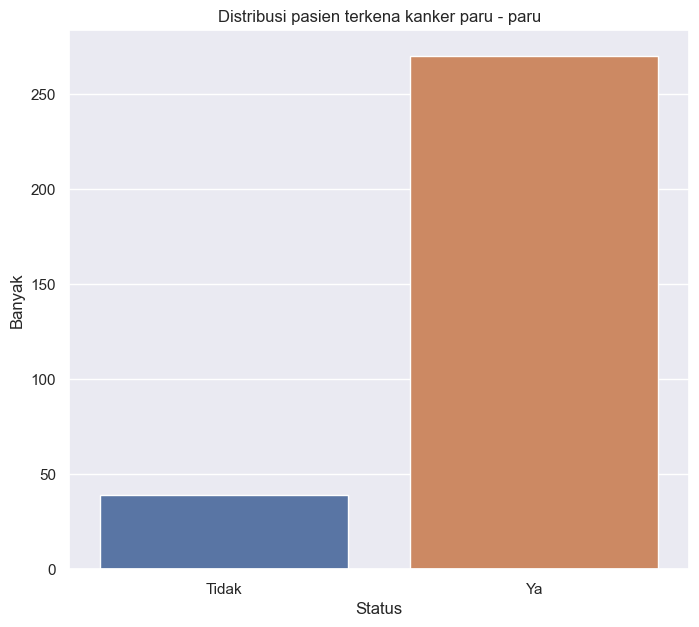

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 7))
sns.countplot(data=data, x='LUNG_CANCER')

plt.xlabel('Status')
plt.ylabel('Banyak')
plt.title('Distribusi pasien terkena kanker paru - paru')
plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'])

plt.show()

### <b>2. Modelling</b>
<hr>

##### Split data training dan data testing

Mengimpor fungsi train_test_split dari modul sklearn.model_selection. 
Fungsi ini digunakan untuk membagi dataset menjadi dua bagian, yaitu train set dan test set.
Setelah itu, mengambil nilai-nilai dari DataFrame df dan menyimpannya dalam variabel df_values
X merupakan variabel independen (features) dan y merupakan variabel dependen (target)
Variabel y merupakan variabel yang ingin diprediksi.
Dalam kode program ini, 30% dari data akan digunakan dalam pengujian
Random state digunakan sebagai seed (benih) untuk mengacak pemisahan data.

In [11]:
from sklearn.model_selection import train_test_split

df_values = df.values
X = df_values[:, 0:-1]
y = df_values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##### Feature scaling

<i>Feature scaling</i> merupakan salah satu tahap dalam pembuatan model yang bertujuan untuk membantu performa mesin dengan cara menempatkan semua fitur dataframe ke dalam satu skala yang sama. Hal ini akan mencegah satu fitur untuk mendominasi fitur yang lainnya.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Membuat model data

Tahap yang terakhir dalam pembuatan model adalah dengan membuat model data itu sendiri. Instansi <i>classifier</i> untuk algoritma SVM diambil dari library scikit-learn. Model dibuat dengan ketentuan kernel "linear" dan random_state 101. Hasil prediksi model kemudian disimpan di dalam variabel y_pred.

In [13]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=101)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

### <b>3. Evaluation</b>
<hr>

##### Classification Report

Mengimpor fungsi classification_report dari modul sklearn.metrics
Fungsi tersebut digunakan untuk menghasilkan laporan klasifikasi berdasarkan perbandingan antara nilai aktual (y_test) dan nilai yang diprediksi oleh model (y_pred).
y_test merupakan variabel yang berisi label sebenarnya (nilai aktual) dari dataset pengujian.
y_pred merupakan variabel yang berisi nilai yang diprediksi oleh model untuk data pengujian yang sesuai dengan y_test.

Penjelasan output :
1. precision : Untuk kelas 0 (kelas pertama), presisi adalah 0.86, yang berarti 86% dari prediksi positif untuk kelas 0 adalah benar. Untuk kelas 1 (kelas kedua), presisi adalah 0.96, yang berarti 96% dari prediksi positif untuk kelas 1 adalah benar.

2. recall : Untuk kelas 0, recall adalah 0.80, yang berarti 80% dari semua instance positif dalam kelas 0 berhasil diidentifikasi. Untuk kelas 1, recall adalah 0.97, yang berarti 97% dari semua instance positif dalam kelas 1 berhasil diidentifikasi.

3. f1-score :  F1-score adalah metrik yang menggabungkan presisi dan recall menjadi satu skor yang berfungsi sebagai ukuran keseluruhan kinerja model. Untuk kelas 0, F1-score adalah 0.83, dan untuk kelas 1, F1-score adalah 0.97.

4. support : Ada 15 instance dalam kelas 0 dan 78 instance dalam kelas 1.

5. accuracy : Akurasi adalah persentase dari prediksi yang benar (semua kelas) dibandingkan dengan total instance. Dalam program ini, akurasinya 0.95, yang berarti model berhasil memprediksi dengan benar sekitar 95% dari semua instance dalam dataset pengujian.

6. macro avg : rata-rata metrik (presisi, recall, f1-score) untuk semua kelas

7. weighted avg : rata-rata metrik yang diberi bobot berdasarkan jumlah instance dalam masing-masing kelas. 



In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.96      0.97      0.97        78

    accuracy                           0.95        93
   macro avg       0.91      0.89      0.90        93
weighted avg       0.95      0.95      0.95        93



##### Confusion Matrix dengan visualisasi berupa Heatmap

Selain classification report, salah satu bentuk evaluasi model lainnya adalah confusion matrix. Confusion matrix merupakan salah satu metode evaluasi data model dengan cara membagi hasil prediksi model kedalam 4 kategori, yaitu <i>true positives, true negatives, false positives,</i> dan <i>false negatives</i>. Hasil evaluasi ini kemudian akan menghasilkan matrix yang dapat divisualisasikan dalam bentuk Heatmap.

<AxesSubplot:>

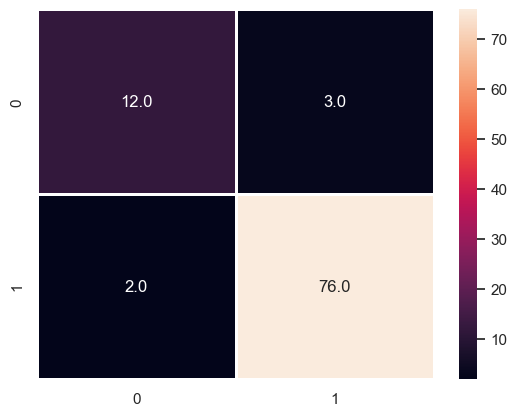

In [15]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt=".1f", linewidths=1)

##### Grid Search

GridSearchCV digunakan untuk mencari parameter terbaik
Dalam program ini, nilai-nilai yang akan diuji untuk setiap hiperparameter yaitu untuk C, gamma, dan kernel. Ini akan menguji lima nilai berbeda untuk C (0.1, 1, 10, 100, 1000), empat nilai berbeda untuk gamma (1.1, 0.01, 0.001, 0.0001), dan satu nilai untuk kernel (linear).
refit=True menginstruksikan GridSearchCV untuk melatih ulang model dengan hiperparameter terbaik yang ditemukan setelah pencarian selesai. 
cv=2 adalah jumlah lipatan (folds) dalam validasi silang (cross-validation) yang akan digunakan selama pencarian hiperparameter. 

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'C' : [0.1, 1, 10, 100, 1000], 
  'gamma' : [1.1, 0.01, 0.001, 0.0001], 
  'kernel' : ['linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=2)
grid.fit(X_train,y_train)


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

Hasil prediksi akan disimpan dalam variabel grid_predictions. Prediksi menggunakan model SVM yang telah diatur ulang dengan hiperparameter terbaik. 
Setelah itu, mencetak laporan klasifikasi yang membandingkan nilai aktual (y_test) dengan prediksi yang telah dihasilkan (grid_predictions). 
Variabel grid_predictions kemudian dievaluasi juga menggunakan confusion matrix dan divisualisasikan juga dengan menggunakan Heatmap.  

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.94      0.97      0.96        78

    accuracy                           0.92        93
   macro avg       0.89      0.82      0.85        93
weighted avg       0.92      0.92      0.92        93



<AxesSubplot:>

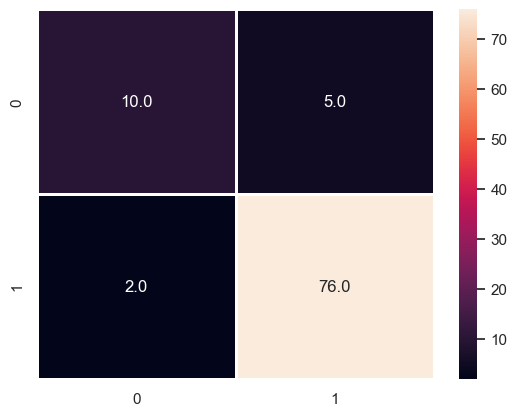

In [25]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
sns.heatmap(confusion_matrix(y_test, grid_predictions), annot=True, fmt=".1f", linewidths=1)